In [2]:
from pydaqmx_helper.digital_io import Digital_IO
import numpy as np
from pydaqmx_helper.adc import ADC
from time import sleep
import matplotlib.pyplot as plt

In [3]:
myADC= ADC()

In [4]:
myADC.addChannels([0])

Activated Channel 0


In [73]:
out=myADC.readVoltage()
print(out)

4.586571522723839


In [5]:
DIO = Digital_IO() 
DIO.write(0)

Created digital output port: Dev7/port0:1


'0b000000000000'

In [6]:
def Move(turns,direction,motors):
    state=1
    DIO=Digital_IO()
    i=0
    DIO.write(state)
    if direction==1:
        state=state+2
        DIO.write(state)
        print('Valid')
    elif direction==-1:
        print('Valid2')
        state=state
        DIO.write(state)
    else:
        state=0
        DIO.write(state)
        print('Invalid')
        return
    sleep(0.1)
    if motors==1: #Detector
        print('Doingm1')
        while i<turns:
            state=state+8
            print(state)
            DIO.write(state)
            sleep(0.040)
            state=state-8
            DIO.write(state)
            print(state)
            i+=1
    if motors==2: #Prism
        print('Doingm2')
        while i<turns:
            state=state+16
            print(state)
            DIO.write(state)
            sleep(0.040)
            state=state-16
            DIO.write(state)
            print(state)
            i+=1
    state=0
    DIO.write(state)
    print('endstate',state)
    return

In [128]:
Move(280,-1,2)

Created digital output port: Dev7/port0:1
Valid2
Doingm2
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17
1
17


In [122]:
#Calibration: 200 turns=9deg
#1 turn = 9/200 for detector
#Calibration 1150 turns= 50deg
#Same ratio


In [96]:
def degtoturn(deg):
    return (200/9)*deg
degtoturn(45)
def turntodeg(turn,offset=0,dire=1):
    degs=[]
    for i in turn:
        degs.append(dire*i*0.045+offset)
    return degs
def ext2int(ext):
    ints=[]
    for i in ext:
        ints.append((180/np.pi)*(np.arcsin((np.sin((np.pi/180)*i-(np.pi/4))/1.6))+(np.pi/4)))
    return ints
def Savefunc(name,dataarray):
    data=np.transpose(dataarray)
    np.savetxt(name,data)
def Normaliser(voltages):
    Normed=[]
    for i in voltages:
        Normed.append(i/np.max(voltages))
    return Normed


In [19]:
def Measure(turns,direction):
    state=1
    DIO=Digital_IO()
    i=0
    turncount=[]
    intensity=[]
    DIO.write(state)
    if direction==1:
        state=state+2
        DIO.write(state)
    elif direction==-1:
        state=state
        DIO.write(state)
    else:
        state=0
        DIO.write(state)
        print('Invalid')
        return
    sleep(0.1)
    while i<turns:
        state=state+8
        DIO.write(state)
        state=state-8
        DIO.write(state)
        #print('det1')
        sleep(0.080)
        state=state+8
        DIO.write(state)
        state=state-8
        DIO.write(state)
        #print('det2')
        sleep(0.080)
        state=state+16
        DIO.write(state)
        state=state-16
        DIO.write(state)
        #print('prism')
        sleep(0.080)
        output=myADC.readVoltage()
        turncount.append(i)
        intensity.append(output)
        print(f'Turn#{i}',end='\r')
        i+=1
    state=0
    DIO.write(state)
    results=[turncount,intensity]
    return results
    

In [55]:
Ans=Measure(500,1)

Created digital output port: Dev7/port0:1


In [195]:
Ans=Measure(1000,1)

Created digital output port: Dev7/port0:1


In [1]:
DIO.write(0)


NameError: name 'DIO' is not defined

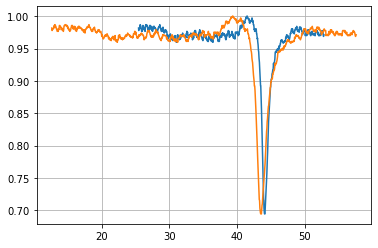

In [198]:
#print(ext2int(turntodeg(Ans[0])))
plt.plot(ext2int(turntodeg(Ans[0],offset=57.6,dire=-1)),Normaliser(Ans[1]))
plt.plot(turntodeg(Ans[0],offset=57.6,dire=-1),Normaliser(Ans[1]))
plt.grid(True)
#plt.xlim(42,48)


In [200]:
Savefunc('GCres/Attempt16GC.txt',Ans)

In [133]:
ext2int([30])

[35.69082180402318]

In [187]:
T8,V8=np.loadtxt('GCres/Attempt12GC.txt',unpack=True)

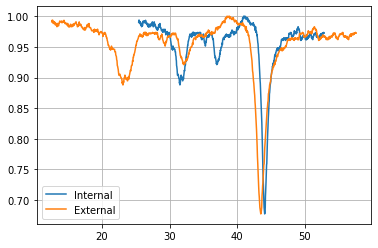

In [188]:
plt.plot(ext2int(turntodeg(T8,offset=12.6,dire=1)),Normaliser(V8))
plt.plot(turntodeg(T8,offset=12.6,dire=1),Normaliser(V8))
plt.grid(True)
#plt.xlim(40,45)
plt.legend(['Internal','External'])